# Active Inference for Markov Decision Processes

> This notebook provides an example of the `inferactively` toolbox 

## Environments

The `inferactively` toolbox includes environments that follow the openAI `gym` API. Here, we will use a 1D grid-world environment. 

We assume a grid world with a shape $1 \ x \ h$. At each time step $t$, the environment generates observations about the agents positions in the grid world. Agents can take one of 3 actions - `{LEFT, STAY, RIGHT}`.

Below, we demonstrate how an environment can be initialized and run forward with random actions. 

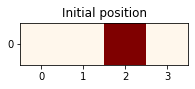

Agent action [STAY]


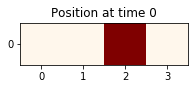

Agent action [LEFT]


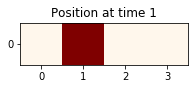

Agent action [RIGHT]


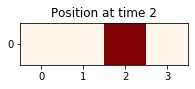

In [4]:
from inferactively.envs import DGridWorldEnv

env_shape = [1, 4]
env = DGridWorldEnv(shape=env_shape)

obs = env.reset()
env.render("Initial position")

T = 3
for t in range(T):
    action = env.sample_action()
    obs = env.step(action)
    print(f"Agent action [{env.CONTROL_NAMES[action]}]")
    env.render(f"Position at time {t}")

## Generative model

We start by considering a generative model without control states. In other words, the agent passively percieves its position and transitions through state space. 

TypeError: only size-1 arrays can be converted to Python scalars

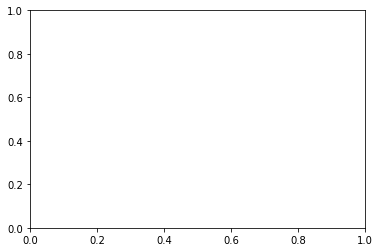

In [6]:
from inferactively.distributions import Categorical

B = env.get_transition_dist()
B = Categorical(values=B[:, :, 0])
B.plot()